# Mini-stage d'analyse pour l'ingénieur

**Brigitte Bidegaray-Fesquet, Abdessami Jalled, Zeinab Mohamad Ali, Valérie Perrier**

Tous les documents pour ce TP sont disponibles dans le dossier [Documents/TP Jupyter LaTeX](https://chamilo.grenoble-inp.fr/main/document/document.php?cidReq=ENSIMAG3MMAI&id_session=0&gidReq=0&gradebook=0&origin=&id=775120) sur Chamilo.

### Le but de ce mini-stage est

* de faire connaissance avec certaines librairies **python** pour le calcul scientifique ;
* de faire connaissance avec l'écriture de formules en **LaTeX**, outil de traitement de texte utilisé notamment en mathématiques ;
* de s'exercer au **compte-rendu de TP** sur des exercices en lien avec le cours d'analyse pour l'ingénieur;
* de rédiger ce TP dans un *notebook* permettant de présenter conjointement les calculs et la démarche suivie, et permettant la reproductibilité de vos résultats.

La partie 1 de ce sujet vous propose une introduction rapide au *notebook*. Prenez le temps de parcourir l'aide.
    
La partie 2 présente quelques librairies python pour les mathématiques avec une application aux sinusoïdes. Prenez le temps de répondre aux questions sur la représentation des vecteurs et des matrices. 
    
La partie 3 introduit les séries de Fourier et vous permettra dans l'écriture des réponses de vous familiariser avec l'écriture des équations en LaTeX. Des exemples vous sont donnés en éditant les zones <i>markdown</i> de ce sujet. C'est le cœur du sujet avec les propriétés des séries de Fourier et leur illustration numérique sur un exemple.
    
Enfin la dernière partie est plus libre et vous donne quelques pistes d'exploration autour du sujet.

La notation prendra en compte la qualité de la programmation du point de vue de l'utilisation du langage python et de l'algorithmique, et de la qualité de la rédaction, tant en ce qui concerne la présentation en LaTeX que le contenu scientifique.

### Consignes pour le rendu 

* Travailler en binôme et déclarer ces binômes sur Teide. 
Les deux membres du binôme doivent être dans le même groupe de TP.
* Modifier le présent *notebook* en rédigeant les réponses dans les cellules prédéfinies.
* Renommer ce *notebook* &lt;NomBinome1-NomBinome2&gt;.ipynb et le déposer sur Teide.
* Le *notebook* doit s'exécuter parfaitement et présenter l'analyse des résultats obtenus (et non leur paraphrase puisque les résultats sont déjà visibles dans le *notebook*) et des commentaires éventuels permettant la compréhension des choix algorithmiques effectués ou des difficultés rencontrées. 
Le compte-rendu doit néanmoins rester relativement concis.
* Relisez-vous, soignez la présentation des figures et des formules mathématiques.

<h3 align=center><font color="red">Date limite de rendu : vendredi 10 janvier 2025 à 23h59</font></h3>

Bon courage à tous, et <u>n'hésitez pas à faire appel aux encadrants</u> aussi souvent que nécessaire !

## 1. Travailler dans un *notebook*

L'utilisation d'un *notebook* permet de réunir en un même lieu, la description du problème à résoudre et des méthodes utilisées, le code correspondant, les sorties du code et en particulier ici des graphiques, et l'analyse des résultats obtenus. C'est un des outils pour permettre la reproductibilité de résultats. 

### 1.1. Types de cellules

Il est constitué d'une succession de cellules notamment
* **des cellules de texte** (`Markdown`) dont le formattage est un mélange de *markdown*, d'HTML et de LaTeX. Il suffit de double-cliquer sur une telle cellule pour voir comment elle est rédigée. `Maj`-`Entrée` permet d'interpréter le contenu de la cellule.
* **des cellules de code**, dans lesquelles on rédige le code. Leur exécution peut afficher des résultats ou des courbes.

### 1.2.  Formattage du texte

N'hésitez pas à imiter ! Par exemple, dans cette cellule, vous pouvez voir comment coder en *markdown* 
* un titre (de niveau 2 et 3),
* du texte en *italique*,
* du texte en **gras**,
* des commandes,
* une liste.

Dans la cellule au dessus, le changement de couleur de texte résulte de l'utilisation de commandes HTML (`<font color=red>...</font>`).

LaTeX (prononcer latek...) est utilisé pour écrire les formules mathématiques, mais ce langage dépasse de loin cet usage. Il sert pour écrire des documents complets où tout le contenu et le formattage sont codés dans ce langage. Vous trouverez plus d'informations sur Chamilo. Vous trouverez également plus loin des exemples d'utilisation, dans la présentation des séries de Fourier. 

Pour un joli rendu, toutes les formules, même constituées d'un symbole unique, doivent être en LaTeX.
Les formules *en ligne* doivent être encadrées par des dollars (`$formule$`). Il y a plusieurs façons de disposer des formules sur une ligne à part, ici nous utilisons `\begin{equation}une ligne de formules\end{equation}` pour une seule ligne et `\begin{align}plusieurs lignes de formules\end{align}` pour aligner avec `&` plusieurs lignes séparées par `\\`.


### 1.3. L'aide

Dans l'onglet `Help`, vous y trouverez notamment de l'aide sur
* le fonctionnement d'un *notebook*,
* le langage *markdown*,
* quelques librairies python.

Vous pouvez également accéder à la documentation de python en tapant `help()`.
Laissez-vous guider. Essayez les recherches suivantes.
* `print`
* `symbols`

N'oubliez pas de faire `quit` à la fin...

In [3]:
#help()

Vous pouvez aussi directement demander l'aide d'une fonction particulière.

In [4]:
help(print)

Help on built-in function print in module builtins:

print(*args, sep=' ', end='\n', file=None, flush=False)
    Prints the values to a stream, or to sys.stdout by default.
    
    sep
      string inserted between values, default a space.
    end
      string appended after the last value, default a newline.
    file
      a file-like object (stream); defaults to the current sys.stdout.
    flush
      whether to forcibly flush the stream.



## 2. Signaux sinusoïdaux purs

L'analyse de Fourier est basée sur la représentation à l'aide de signaux sinusoïdaux purs. Un signal pur de fréquence $\lambda$ s'écrit
\begin{equation}
t \mapsto \sin(2\pi\lambda t).
\end{equation}
En guise d'échauffement en python, nous allons voir comment les calculer numériquement et les représenter graphiquement. 

### 2.1. Librairies python utiles

Pour le présent TP, nous aurons besoin d'un certain nombre de librairies pour les mathématiques.
* la commande `%matplotlib inline` permet d'effectuer les graphismes en ligne dans le *notebook*,
* `matplotlib.pyplot` contient les fonctions pour tracer les courbes,
* `numpy` contient les fonctions pour le travail sur les tableaux et les matrices,
* `math` contient les fonctions mathématiques usuelles.

Dans ce TP, on utilisera systématiquement des objets `numpy` pour représenter les vecteurs et les matrices (et non des listes).
À noter que les fonctions de base ont aussi des versions dans la librairie `numpy` qui s'appliquent aux objets (vecteurs, matrices) terme-à-terme. Pour savoir exactement ce que l'on utilise, on a intérêt à expliciter les librairies et à ne pas tout importer avec `*`.

Commençons par importer les librairies nécessaires. 
À noter que ce qui est déjà importé dans un *notebook* n'est pas à ré-importer lors d'utilisations ultérieures. 

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi, cos, sin

Pour une implémentation numérique des fonctions, nous allons bien sûr devoir nous limiter à leur discrétisation, c'est-à-dire ici à leur représentation par leurs valeurs sur un ensemble discret et fini de points. Ces points ainsi que les valeurs de fonctions en ces points seront donc représentés par des vecteurs.

### 2.2. Vecteurs et matrices

La façon la plus simple de définir une matrice $n \times m$ en python est d'entrer au clavier la liste de ses éléments, par exemple

```
A = np.array([[a11, a12, a13], [a21, a22, a23]])
```

**Opérations élémentaires**

* `A[k, :]` une ligne de la matrice $A$       
* `A + B` somme
* `np.matmul(A, B)` ou `A@B` produit matriciel
* `A * B` produit terme à terme
* `np.linalg.det(A)` déterminant de $A$
* `np.transpose(A)` transposée de $A$
* `np.linalg.inv(A)` inverse de $A$

En python, la numérotation commence à 0.

#### <font color=blue>Questions : Testez les opérations sur les matrices</font>

Définir la matrice
\begin{equation}
    M = \begin{pmatrix}
      1 & 0 & 3 & 1 \\
      1 & 2 & 0 & 1 \\
      0 & 1 & 3 & 0
    \end{pmatrix}.
\end{equation}
1. Quelle est la commande donnant les dimensions de la matrice $M$ ?

In [6]:
# Déclaration de la matrice M
M = np.array([[1, 0, 3, 1], [1, 2, 0, 1], [0, 1, 3, 0]])

# Dimensions de M 
dim = np.shape(M)
print(dim)

(3, 4)


2. Extraire la première ligne, la dernière colonne et l'élément à la deuxième ligne, troisième colonne de $M$.

In [7]:
# Extraction de la première ligne de M
l1 = M[0, :]
print(l1)

# Extraction de la dernière colonne de M
c4 = M[0: ,3]
print(c4)

# Extraction de l'élément à la 2ème ligne, 3ème colonne de M
a23 = M[1,2]
print(a23)

[1 0 3 1]
[1 1 0]
0


3. À l'aide de fonctions de la librairie numpy, extraire la diagonale, les parties triangulaires supérieures et inférieures de $M$.

In [8]:
# Extraction de la diagonale de M
d = np.diagonal(M)
print(d)

# Extraction de la partie triangulaire supérieure de M
tri_sup = np.triu(M)
print(tri_sup)

# Extraction de la partie triangulaire inférieure de M
tri_inf = np.tril(M)
print(tri_inf)

[1 2 3]
[[1 0 3 1]
 [0 2 0 1]
 [0 0 3 0]]
[[1 0 0 0]
 [1 2 0 0]
 [0 1 3 0]]


4. En utilisant les fonctions `np.ones` et `np.diag`, définir la matrice identité $10\times 10$.


In [9]:
# Définition de la matrice identité 10x10
id_10 = np.diag(np.diag(np.ones((10,10))))
print(id_10)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


5. En utilisant ces mêmes fonctions, définir la matrice tridiagonale d'ordre $10$ suivante :
\begin{equation}
      C = \begin{pmatrix}
          2 & -1& & \mathbf{0} \\
          1 & 2 & \ddots & \\
          & \ddots & \ddots & -1 \\
          \mathbf{0}& & 1 & 2 \\
        \end{pmatrix}
\end{equation}

In [10]:
# Définition de la matrice C 
C_1 = np.diag(np.diag(2*np.ones((10,10))))
C_2 = np.diag(np.diag(np.ones((9,9))), k = -1)
C_3 = np.diag(np.diag((-1)*np.ones((9,9))), k = 1)
C = C_1 + C_2 + C_3
print(C)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  2.]]


### 2.3. Définir et tracer des fonctions
#### 2.3.1. Définition de fonctions

Considérons par exemple la fonction 
\begin{equation}
f(x) = \sin(2\pi x)+\cos(\pi x).
\end{equation}
Nous pouvons la définir ainsi en python
```
def f(x):
     return sin(2 * pi * x) + cos(pi * x)
```

#### 2.3.2. Fonctions échantillonnées (= discrétisées)

Pour le calcul numérique, une fonction peut être définie uniquement en des points de discrétisation de la variable $x$. Par exemple

```
x = np.linspace(0, 1, 11)
```
correspond à une discrétisation par pas de $0.1=1/(11-1)$, de l'intervalle $[0,1]$, soit 11 valeurs. On définit alors la fonction sur cette grille discrète. Avec l'exemple précédent, il vaut mieux redéfinir
```
def f(x):
     return np.sin(2 * pi * x) + np.cos(pi * x)
```
et alors il suffit d'écrire
```
y = f(x)
```
pour calculer toutes les valeurs de la fonction $f$.

#### 2.3.3. Tracé de courbes

Pour tracer une courbe $y=x^2$ sur l'intervalle $[a,b]$ :
```
x = np.linspace(a, b, n) # x est échantillonné entre a et b avec un pas de (b-a)/(n-1)
z = x**2
plt.plot(x, z)
```

##### Pour varier le trait ou la couleur

Par exemple, pour tracer en rouge :
```
plt.plot(x, z, 'r-')
```
Dans la chaîne de caractères (troisième argument), on donne une lettre imposant la couleur (`r` pour *red*, `b` pour *blue*, `g` pour *green*...) et un symbole pour le trait (`-` pour un trait continu (par défaut), `--` pour des tirets, `:` pour des pointillés...). Pour plus de détails, voir la documentation de `matplotlib.lines.Line2D`.

##### Pour tracer plusieurs courbes, rajouter un titre, des axes, une légende

```
x = np.linspace(0, 10, 101)
plt.plot(x, np.cos(x), 'r', label='cosinus')
plt.plot(x, np.sin(x), 'b', label='sinus')
plt.title('Graphe des fonctions cos et sin')   # titre
plt.xlabel('temps')
plt.ylabel('f(t)');                            # noms des axes
plt.legend()                                   # légende qui utilise les labels
```

##### Pour tracer plusieurs graphes dans une fenêtre
La commande `plt.subplot(n, m, p)`, placée avant un tracé de courbe, subdivise la fenêtre du graphe en une matrice $n\times m$ de sous-fenêtres et sélectionne la $p$-ième pour dessiner le graphe courant&nbsp;: l'élément $(i, j)$ de la matrice correspond au graphe numéro $(i-1)n + j$.

##### Pour exporter une figure
La commande `plt.savefig('<fichier', format='pdf')`permet de sauver la figure courante au format pdf. D'autres formats sont possibles.

#### <font color = blue>Question : Testez le tracé de fonctions</font>

Tracer avec deux couleurs différentes les courbes de la fonction sinus sur l'intervalle $[0,2\pi]$ pour 6 points de discrétisation et 21 points de discrétisation. 
Ajouter un titre et une légende.

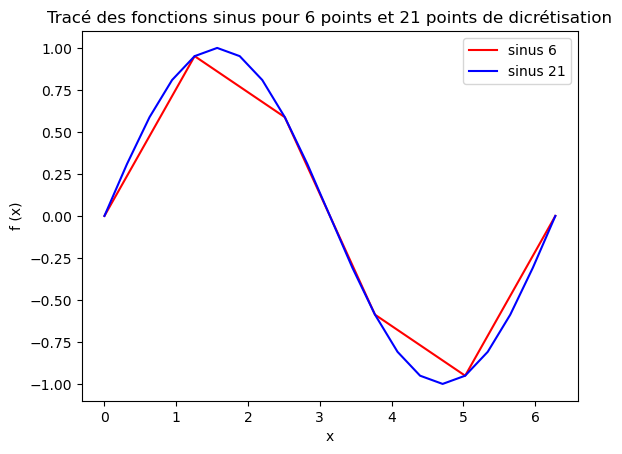

In [11]:
plt.title("Tracé des fonctions sinus pour 6 points et 21 points de dicrétisation")
# Tracé de sinus sur [0,2pi] pour 6 points de discrétisation
x = np.linspace(0, 2*pi, 6)
plt.plot(x, np.sin(x), 'r-', label= 'sinus 6')
plt.xlabel('x')
plt.ylabel('f (x)')

# Tracé de sinus sur [0, 2pi] pour 21 points de discrétisation
x_prime = np.linspace(0, 2*pi, 21)
plt.plot(x_prime, np.sin(x_prime), 'b-', label='sinus 21')
plt.legend()


## 3. Les séries de Fourier

Pour en savoir plus : <br>
[Ber14] Maïtine Bergounioux, [*Mathématiques pour le traitement du signal*](https://beluga.univ-grenoble-alpes.fr/permalink/33UGRENOBLE_INST/rgi2mt/alma991003269059706161), 2e édition, Dunod (2014).
<br>
[Sch01] Michelle Schatzman, [*Analyse numérique : une approche mathématique*](https://beluga.univ-grenoble-alpes.fr/permalink/33UGRENOBLE_INST/1vb34gl/alma991005329019706161), chapitre "Du côté de chez Fourier", Dunod (2001).

### 3.1. Notations

#### Polynômes trigonométriques

On appelle $\mathbb{T}_N$ l'espace vectoriel des polynômes trigonométriques de degré au plus $N$ qui s'écrivent sous la forme 
\begin{equation}
\sum_{n=-N}^N c_n \exp\left(2i\pi n\dfrac tT\right),
\end{equation}
où pour $n\in\{-N,\dots,N\}$, $c_n$ est un nombre complexe. Ces polynômes trigonométriques sont clairement des fonctions périodiques de période $T$.

#### Espaces fonctionnels

On note $\mathcal{C}_{\rm per}^k$ l'espace des fonctions $k$ fois continûment différentiables, périodiques de période $T$. Un cas particulier est $\mathcal{C}_{\rm per}^0$, espace des fonctions continues, périodiques de période $T$.

On note $\mathcal{L}_{\rm per}^1$ l'ensemble des fonctions Lebesgue-intégrables sur tout intervalle borné de $\mathbb{R}$, périodiques de période $T$. On le munit de la norme
\begin{equation}
\|f\|_1 = \int_0^{T} |f(t)| dt.
\end{equation}

On note $\mathcal{L}_{\rm per}^2$ l'ensemble des fonctions de carré Lebesgue-intégrables sur tout intervalle borné de $\mathbb{R}$, périodiques de période $T$. On le munit de la norme
\begin{equation}
\|f\|_2 = \left(\int_0^{T} |f(t)|^2 dt\right)^{1/2}.
\end{equation}

### 3.2. Coefficients de Fourier complexes

Étant donné $f\in\mathcal{L}_{\rm per}^1$, on définit le $n$-ième coefficient de Fourier par 
\begin{equation}
c_n(f) = \frac 1T \int_0^T f(t) \exp\left(-2i\pi n\dfrac tT\right) dt.
\end{equation}
On peut alors construire le polynôme trigonométrique
\begin{equation}
S_N(t) = \sum_{n=-N}^N c_n(f) \exp\left(2i\pi n\dfrac tT\right).
\end{equation}

Si de plus $f\in\mathcal{L}_{\rm per}^2$, on peut montrer que $S_N$ réalise l'approximation au sens des moindres carrés de $f$ dans $\mathbb{T}_N$, c'est-à-dire que
\begin{equation}
\forall P\in\mathbb{T}_N,\ \int_0^T |f-S_N|^2 dt \leq \int_0^T |f-P|^2 dt.
\end{equation}

**<font color=blue>Question :</font>** 
Rappeler la formule de quadrature des rectangles à gauche permettant d'approcher l'intégrale $c_n(f)$ avec $J$ points de discrétisation régulièrement espacés. (Cela revient à généraliser à une intégrale sur $[0,T]$ la formule vue sur la première feuille de TD.) On utilisera ces points de discrétisation régulièrement espacés en temps dans la suite.

<font color = blue> $$\begin{equation}  c_n(f) = \frac{1}{J} \sum_{k = 0}^{J-1} f(x_k) \exp{(-2i\pi n \frac{x_k}{T})} \qquad \text{avec} \quad x_k \in [\frac{kT}{J}, \frac{(k+1)T}{J}]\end{equation}$$<font>

**<font color=blue>Question :</font>** 
Définir une fonction `discreteFourier` qui prend en entrée 
* un vecteur `numpy` des valeurs d'une fonction $f$ discrétisée avec $J$ points sur $[0,T]$ 
* et le degré $N$ du polynôme trigonométrique,

et retourne les coefficients de Fourier $c_n(f)$. 

In [12]:
def discreteFourier(fj, N):
    """prend en entrée : 
        - un vecteur ecteur numpy 
          des valeurs d'une fonction  𝑓
          discrétisée avec  𝐽 points sur  [0,𝑇]
        - le degré N du poynôme trigonométrique 
       renvoie les coefficients de Fourier c_n(f)"""
    # Nombre de points de discrétisation
    J, = np.shape(fj)
    # print(J)
    # Array de taille N x N pour les coeffs de Fourier (initialisés à 0)
    cf_arr = np.zeros(2*N + 1, dtype= complex)
    # Calcul des coeffs de Fourier
    for i in range(-N, N+1) :
            k = 0
            coeff = 0
            while k <= J-1 :
                coeff += (1/J) * fj[k] * np.exp(-2j*pi*i*k/J)        # On prend x_k = kt/J
                k += 1
            cf_arr[N + i] = coeff
    return cf_arr

**<font color = blue>Question :</font>** 
Définir une fonction `invFourier` qui prend en entrée 
* un vecteur `numpy` des coefficients de Fourier $c_n$ 
* et le nombre $J$ de points de discrétisation en temps, 

et retourne la somme partielle $S_N$ aux temps de discrétisation.

In [34]:
def invFourier(cn, J):
    N =  int((np.shape(cn)[0] - 1) / 2)
    S_n = np.array([])
    for k in range(J):
        s_k = 0
        for i in range(-N,N+1):
            s_k += cn[N + i]*np.exp(2j * pi * i * k/J)
        S_n = np.append(S_n,s_k)
    return S_n

### 3.3. Un exemple

Soient $0<a\leq T$ et un signal créneau, c'est-à-dire la fonction périodique de période $T$ définie sur $[-T/2,T/2]$ par
\begin{equation}
f(t) = \begin{cases}
A & \text{sur } \left[-\dfrac a2,\dfrac a2\right], \\
0 & \text{ailleurs.}
\end{cases}
\end{equation}

**<font color = blue>Question :</font>** 
Définir cette fonction comme fonction python qui dépend de $t$, $a$, $T$ et $A$.<br>
Tracer cette fonction sur l'intervalle $[-T,T]$, pour les valeurs $T=2$, $a=0,4$, $A=1,5$.
(On gardera ces valeurs pour les illustrations numériques qui suivront.)

Text(0.5, 1.0, 'Tracé du signal créneau sur [-T, T] avec T = 2')

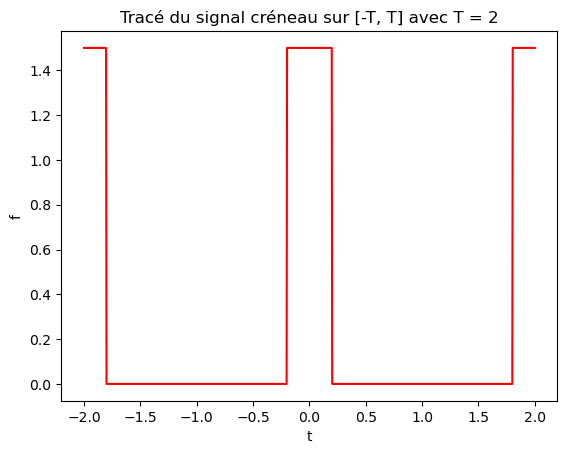

In [14]:
def f(t, a, T, A):
    # f est définie sur l'intervalle [-T/2, T/2]
    #if t < -T/2 or t > T/2 :
    #   return
    if t < 0:
        return f(-t,a,T,A)
    else :
        # f vaut A sur [-a/2 + kT, a/2 + kT]
        if 0 <= t % T <= a/2 or T-a/2 <= t % T < T :
            return A
        # f vaut 0 en dehors de [-a/2 + kT, a/2 + kT]
        else :
            return 0
    
# Vectorisation de f 
f_vectorisee = np.vectorize(f)

# Tracé de f sur [-T, T]
T = 2
a = 0.4
A = 1.5
t = np.linspace(-T, T, 1000)
# print(f_vectorisee(t,a,T,A))
plt.plot(t, f_vectorisee(t,a,T,A), 'r-')
plt.xlabel('t')
plt.ylabel('f')
plt.title('Tracé du signal créneau sur [-T, T] avec T = 2')

**<font color = blue>Question :</font>** 
Calculer les coefficients de Fourier $c_n(f)$ pour la fonction créneau. 

<font color = blue>Soit $n \in \mathbb{Z}^*$. 
    \begin{equation}
    \begin{split}
    c_n(f) & = \frac{1}{T} \int_0^T f(t) \exp\left(-2in\pi \frac{t}{T} \right) \; dt = 
\frac{1}{T} \int_{\frac{-T}{2}}^{\frac{T}{2}} f(t) \exp\left(-2i\pi n\frac{t}{T} \right) \; dt  \\
    & = \frac{1}{T} \int_{\frac{-a}{2}}^{\frac{a}{2}} A \cdot \exp \left(-2i\pi n \frac{t}{T} \right) \; dt
    = \frac{A}{T} \cdot \frac{-T}{2i\pi n} \cdot \left[\exp\left(-2i\pi n \frac{t}{T} \right) \right]_{1}^{2} \\
    & = \frac{-A}{2i\pi n} \left(\exp\left(\frac{-ai\pi n}{T} \right) - \exp\left(\frac{ai\pi n}{T} \right)\right) \\
    & = \frac{A}{\pi n} \cdot \sin\left(\frac{a\pi n}{T} \right) \\
    \end{split}
    \end{equation}
    Pour $n = 0$ : 
    \begin{equation}
    c_0(f) = \frac{1}{T} \int_{\frac{-a}{2}}^{\frac{a}{2}} A \; dt = \frac{A}{T} \cdot \left[t \right]_{\frac{-a}{2}}^{\frac{a}{2}}= \frac{aA}{T}
    \end{equation}
    <font>

**<font color = blue>Question :</font>** 
Calculer ces valeurs en utilisant `discreteFourier`.
On prendra $J=100$ points de discrétisation et on calculera les coefficients jusqu'à $N=10$.
Que pensez-vous de l'approximation ?

In [15]:
# Génération des points de discrétisation
t = np.linspace(0, T, 100)
print(t)
# Calcul du vecteur des valeurs de f sur [0, T]
#fj = f_vectorisee(t,a,T,A) ; ça donne des 1 au lieu de 1.5 et on ne comprend pas pourquoi
fj = np.array([f(elem,a,T,A) for elem in t])
print(fj)

# Calcul des coefficients de Fourier
N = 10    # Degré du polynôme
coeffs_fourier = discreteFourier(fj, N)
print(coeffs_fourier)

[0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 1.79797

<font color = blue> On constate que les valeurs des coefficients de Fourier obtenus numériquement ont une partie imaginaire quasi-nulle (incertitudes).
On remarque aussi que $c_0 =  3.00000000e-01+0.00000000e+00j $ (11ème élément du vecteur) ce qui correspond bien à la valeur de $c_0$ calculée à la question précedente, car son calcul n'implique des fonctions qui peuvent apporter de l'incertitude comme exponentielle (utilisée dans la fonction discreteFourier). \
On note par ailleurs que pour les valeurs de n qui sont divisibles par 5, la partie réelle est quasiment nulle car dans ce cas $\sin(0.2n\pi) = 0$.<font>

### 3.4. Coefficients réels

Reprenons une fonction $f$ générique.
En utilisant les formules d'Euler, on peut réécrire l'expression de $S_N$ sous la forme
\begin{equation}
S_N(t) = a_0(f) + \sum_{n=1}^N \left(a_n(f) \cos\left(2\pi n \dfrac tT\right) + b_n(f) \sin\left(2\pi n \dfrac tT\right) \right).
\end{equation} 

**<font color = blue>Question :</font>** 
Calculer les valeurs des $a_n(f)$ et des $b_n(f)$ en fonction des $c_n(f)$.

<font color = blue> Soit $f$ une fonction Lebesgue-intégrable $T$-périodique et soit $N \in \mathbb{N}^*$
    \begin{equation}
    \begin{split}
    S_N(t) & = \sum_{n = -N}^{N} c_n(f) \exp\left(2i\pi n \frac{t}{T} \right) \\
    & = \sum_{n = -N}^{-1} c_n(f) \exp\left(2i\pi n \frac{t}{T} \right) + c_0(f) + \sum_{n = 1}^{N} c_n(f) \exp\left(2i\pi n \frac{t}{T} \right) \\
    & = c_0(f) + \sum_{n = 1}^{N} c_{-n}(f) \exp\left(-2i\pi n \frac{t}{T} \right) + \sum_{n = 1}^{N} c_n(f) \exp\left(2i\pi n \frac{t}{T} \right) \\
    & = c_0(f) + \sum_{n = 1}^{N} c_n(f) \left( \cos\left(2\pi n \frac{t}{T} \right) + i\sin\left(2\pi n\frac{t}{T} \right) \right) + \sum_{n = 1}^{N} c_{-n}(f) \left( \cos\left(2\pi n \frac{t}{T} \right) - i\sin\left(2\pi n\frac{t}{T} \right) \right) \\
    & = c_0(f) + \sum_{n = 1}^{N} \left(c_n(f) + c_{-n}(f) \right) \cdot \cos\left(2\pi n \frac{t}{T} \right) + i\sum_{n = 1}^{N}  \left(c_n(f) - c_{-n}(f) \right) \cdot \sin\left(2\pi n \frac{t}{T} \right) \\
    \end{split}
    \end{equation} \
   Sachant que deux polynômes de même degré sont égaux si et seulement si les coefficients de leurs monômes de même degré sont égaux, on trouve :
    \begin{cases}
     a_n(f) = c_n(f) + c_{-n}(f) \quad & \forall n \in \mathbb{N}^* \\
     b_n(f) = i \cdot (c_n(f) - c_{-n}(f)) \quad & \forall n \in \mathbb{N}^* \\
    a_0(f) = c_0(f)
    \end{cases}
    <font>

On peut également l'écrire
\begin{equation}
S_N(t) = A_0(f) + \sum_{n=1}^N A_n(f) \cos\left(2\pi n \frac tT + \varphi_n(f)\right).
\end{equation} 

**<font color = blue>Question :</font>** 
Calculer les valeurs des $A_n(f)$ et des $\varphi_n(f)$ en fonction des $a_n(f)$ et des $b_n(f)$ d'une part, puis en fonction des $c_n(f)$.

<font color = blue>
    Soit $f$ une fonction $T$-périodique Lebesgue-intégrable (non identiquement nulle).
    \begin{equation}
    \begin{split}
    S_N(t) & = A_0(f) + \sum_{n = 1}^{N} A_n(f) \cdot \cos\left(2\pi n \dfrac tT + \varphi_n(f) \right) \\
    & = A_0(f) + \sum_{n = 1}^{N} A_n(f) \left(\cos\left(2\pi n \dfrac tT \right) \cdot \cos\left(\varphi_n(f) \right) \right) - \sum_{n = 1}^{N} A_n(f) \left(\sin\left(2\pi n \dfrac tT \right) \cdot \sin\left(\varphi_n(f) \right) \right) \\
    & = a_0(f) + \sum_{n=1}^N \left(a_n(f) \cos\left(2\pi n \dfrac tT\right) + b_n(f) \sin\left(2\pi n \dfrac tT\right) \right) \\
    \end{split}
    \end{equation}
     Ainsi, comme les polynômes sont égaux si seulement si les coefficients de même degré sont égaux, alors :
    \begin{cases}
    a_n(f) = A_n(f) \cdot \cos(\varphi_n(f)) \qquad (*)\\
    b_n(f) = - A_n(f) \cdot \sin(\varphi_n(f)) \qquad () \\
    a_0(f) = A_0(f) \\
    \end{cases}
    D'une part, si $\forall n \in \mathbb{N} \; ; a_n(f) \neq 0$, en divisant $()$ par $(*)$, on obtient :
    \begin{equation}
    \tan(\varphi_n(f)) = - \frac{b_n(f)}{a_n(f)} \Longleftrightarrow \tan(-\varphi_n(f)) = \frac{b_n(f)}{a_n(f)}\\
    \end{equation}
    Si $a_n > 0$ alors : 
    \begin{equation}
    \varphi_n = \arctan\left(\frac{-b_n}{a_n}\right)
    \end{equation}
    Sinon, si $a_n < 0$ :
    \begin{equation}
    \varphi_n = \arctan\left(\frac{-b_n}{a_n}\right) + \pi
    \end{equation}
    Enfin, si $a_n = 0$, alors :
    \begin{equation}
    \varphi_n = sign(b_n) \cdot \frac{\pi}{2}
    \end{equation}
    D'autre part, en sommant membre à membre le carré de $()$ et celui de $(*)$, on trouve :
    \begin{equation}
    A_n²(f) \cdot (\cos²(\varphi_n(f)) + \sin²(\varphi_n(f)))= a_n²(f) + b_n²(f) \\
    \end{equation}
    Par conséquent, 
    \begin{equation}
    A_n(f) = \left|\sqrt{a_n²(f) + b_n²(f)} \right| \\
    \end{equation}
    - Réécriture de $A_n(f)$ et $\varphi_n(f)$ en fonction de $c_n(f)$ : 
        $$A_n = 2|{c_n}| \quad \text{et} \quad \varphi_n = arg(c_n)$$
    <font>

**<font color = blue>Question :</font>** 
Représenter sur deux graphes côte-à-côte, $|c_n(f)|$ en fonction de $n$ et $\arg(c_n(f))$ en fonction de $n$ pour la fonction créneau précédemment définie. 

Text(0, 0.5, 'arg(c_n(f))')

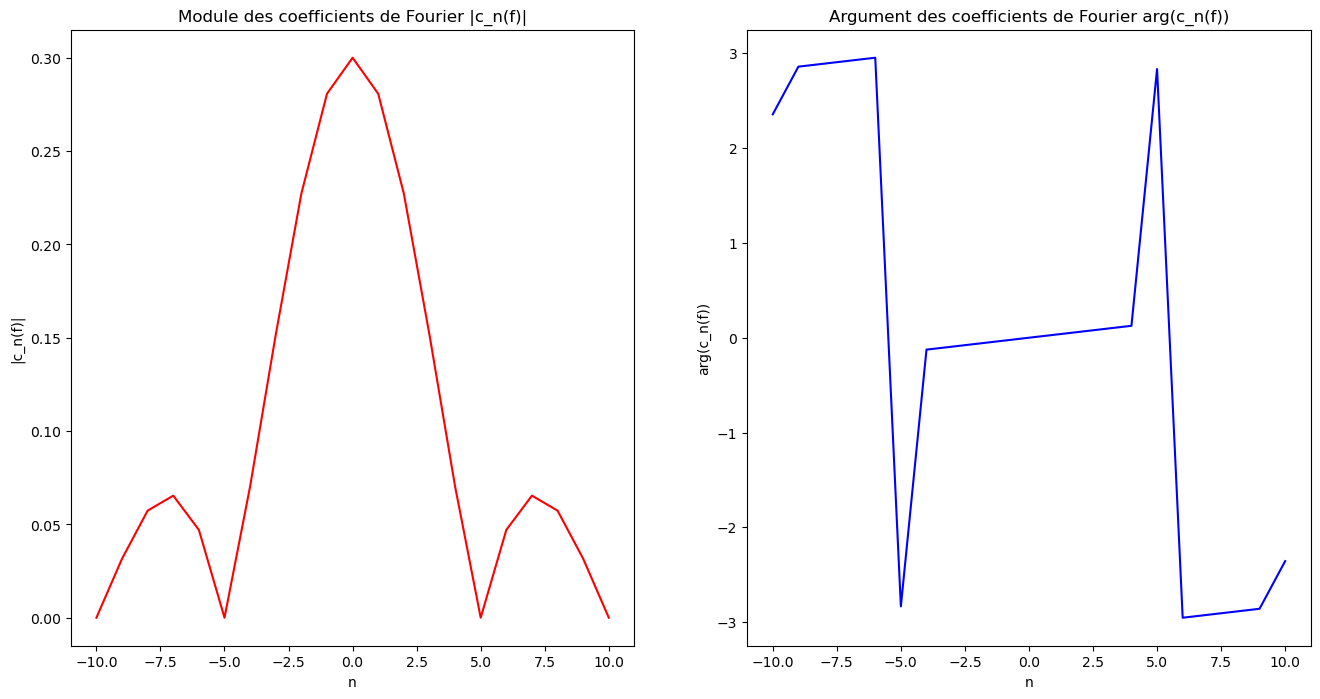

In [16]:
#plt.title("Tracé des du module et de l'argument des coefficients de fourier")
# Points de discrétisation
n = range(-N,N+1)

# Calcul du module des coefficients de Fourier |c_n(f)|
mod_coeffs_fourier = np.absolute(coeffs_fourier)

# Calcul de l'argument des coefficients de Fourier arg(c_n(f))
args = np.angle(coeffs_fourier)

# Tracé des graphes |c_n(f)| et arg(c_n(f)) en fonction de n 
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Tracé du module des coefficients de Fourier
axs[0].plot(n, mod_coeffs_fourier, 'r')
axs[0].set_title("Module des coefficients de Fourier |c_n(f)|")
axs[0].set_xlabel("n")
axs[0].set_ylabel("|c_n(f)|")

# Tracé de l'argument des coefficients de Fourier
axs[1].plot(n, args, 'b')
axs[1].set_title("Argument des coefficients de Fourier arg(c_n(f))")
axs[1].set_xlabel("n")
axs[1].set_ylabel("arg(c_n(f))")

### 3.4. Convergence

Tout l'intérêt des séries de Fourier est qu'elles convergent en un certain sens vers la fonction de départ. 

#### Inégalité de Bessel

Soit $f\in\mathcal{L}_{\rm per}^2(0,T)$ alors 
\begin{equation}
\sum_{n=-N}^N |c_n|^2 \leq \frac1T \int_0^T |f(t)|^2 dt.
\end{equation}

#### Convergence des sommes partielles

Par ailleurs, la suite $S_N$ des polynômes trigonométriques de meilleure approximation dans $\mathbb{T}_N$ converge vers $f$ dans $\mathcal{L}_{\rm per}^2(0,T)$ :
\begin{equation}
\lim_{N\to\infty} \|f-S_N\|_2 = 0.  
\end{equation}
Cela veut dire que la série $\sum_{n\in\mathbb{Z}} c_n(f)\exp(2i\pi n t/T)$ converge normalement et donc presque partout vers $f$.

#### Égalité de Parseval

Soit $f\in\mathcal{L}_{\rm per}^2(0,T)$, alors 
\begin{equation}
\sum_{n=-\infty}^\infty |c_n|^2 = \frac1T \int_0^T |f(t)|^2 dt.
\end{equation}

**<font color = blue>Question :</font>** 
Illustrer graphiquement l'inégalité de Bessel et l'égalité de Parseval sur l'exemple de la fonction créneau. 

0.45225


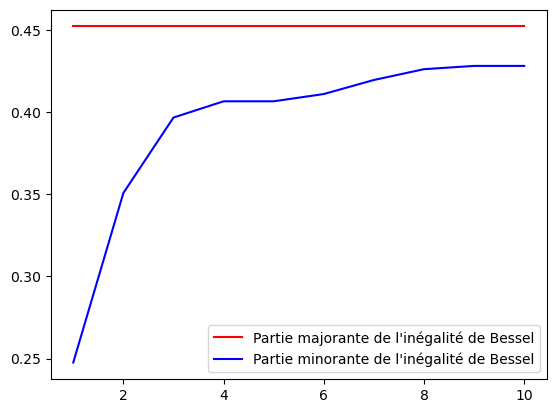

In [28]:
# Approximation de la partie majorante de l'inégalité de Bessel
def approx_integ(g, x, y, n) : 
    """ g est une fonction (créneau dans notre cas)
    x, y sont les bornes de l'intégrale
    n est le nombre des points de discrétisation 
    - renvoie une valeur approchée de la quantité
    majorante de l'inégalité de Bessel via la 
    méthode des trapèzes """
    global a, A, T
    v_approx_integ = 0
    h = (y-x)/n
    for k in range(n) :
        v_approx_integ += np.square(np.absolute(g(x + h*k, a, T, A))) + np.square(np.absolute(g(x + (k+1)*h, a, T, A)))
    v_approx_integ *= h/2
    return v_approx_integ / T

# Calcul de la partie minorante de l'inégalité de Bessel
def somme_coeff(cn) :
    """ prend en paramètre un vecteur de
    coefficients de Fourier et renvoie la somme
    de leur module au carré """
    # Récupération du degré N :
    N = int((np.shape(cn)[0] - 1) / 2)
    arr = np.array([])
    for n in range(1,N+1) :
        coeffs = (cn[N-n:N+n+1])
        somme_cf = 0
        for cf in coeffs :
            somme_cf += np.square(np.absolute(cf))
        arr = np.append(arr, somme_cf)
    return arr

#Tracé de graphes des deux quantités
n = range(1,N+1)
integ_maj = approx_integ(f,0,T,1000)
print(integ_maj)
arr_1 = np.array([integ_maj for i in n])
plt.plot(n, arr_1, 'r-',label='Partie majorante de l\'inégalité de Bessel')
arr_2 = somme_coeff(coeffs_fourier)
plt.plot(n, arr_2, 'b-', label='Partie minorante de l\'inégalité de Bessel')
plt.legend()

        

<font color = blue>On remarque qu'effectivement l'inégalité de Bessel est justifiée graphiquement avec la somme des carrés du module des coefficients de Fourier qui croit en s'approchant de l'intégrale majorante à mesure que N (le degré du polynome) grandit.</font>

#### Théorème de Dirichlet

Soit $f\in\mathcal{L}_{\rm per}^1(0,T)$ et $t_0$ tel que $f$ admette des limites à droite et à gauche en $t_0$, respectivement notées $f(t_0^+)$ et $f(t_0^-)$, alors 
\begin{equation}
\lim_{N\to\infty} \sum_{n=-N}^N c_n(f)\exp\left(2i\pi n \dfrac {t_0}T\right) = \dfrac{f(t_0^+)+f(t_0^-)}2. 
\end{equation}

**<font color = blue>Question :</font>**  
Toujours avec $N=10$ et $J=100$, tracer sur un même graphique la fonction créneau et sa somme de Fourier partielle de degré $N$.

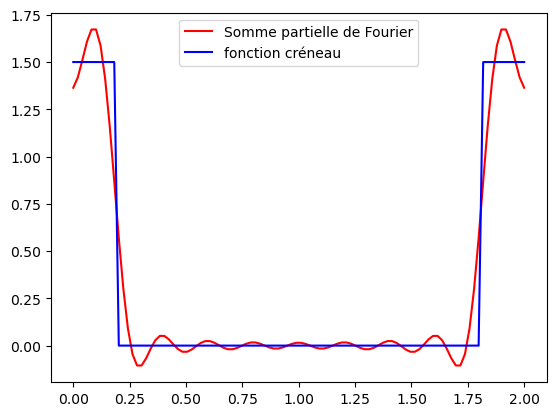

In [40]:
# Tracé de la fonction créneau et de sa somme de Fourier partielle de degré N
coeffs_fourier = discreteFourier(fj, 10)
Sn = invFourier(coeffs_fourier, 100)
plt.plot(t,Sn,'r',label = 'Somme partielle de Fourier')
plt.plot(t,fj,'b',label ='fonction créneau')
plt.legend()


<font color = blue>Les 2 courbes sont compatible malgré une différence plus importantes au niveau des points de discontinuité</font>

## 4. Calcul de sommes de séries

On considère maintenant la fonction $g$, $2\pi$ périodique, donnée par $g(x)=x^2$ sur l'intervalle $[-\pi,\pi]$.

**<font color = blue>Question :</font>**  
Calculer les coefficients de Fourier $c_n(g)$. 

<font color = blue>$$c_0 = \frac{1}{2\pi}\int_{-\pi}^{\pi} x^{2} \,dx $$ 
$$c_0 = \frac{\pi^{2}}{3}$$ ;
   <font color = blue>$$
2 \int_{0}^{\pi} \frac{x^2 \cos(nx) \, dx}{2\pi} = \frac{1}{n \pi} \int_{0}^{\pi} x^2 \left[ \frac{\sin(nx)}{n} \right]' dx
$$

<font color = blue>$$
= \left[ x^{2} \sin(nx) \right]_{0}^{\pi} - \frac{1}{n \pi} \int{0}^{\pi} 2x \sin(nx) \, dx
$$

<font color = blue>$$
= 0 + \frac{2}{n^2 \pi} \int_{0}^{\pi} x \left( \cos(nx) \right)' dx
$$

<font color = blue>$$
= 0 + \frac{2}{n^2 \pi} \left[ \cos(nx) x \right]_{0}^{\pi} - 2 \int_{0}^{\pi} \cos(nx) \, dx
$$

<font color = blue>$$
= \frac{2  (-1)^n}{n^2} \quad \left( \text{car } \int_{0}^{\pi} \cos(nx) \, dx = 0 \right)
$$
</font>

**<font color = blue>Question :</font>**  
En utilisant les théorèmes de la question 3.4, expliquer comment calculer à l'aide de ces coefficients de Fourier les sommes des séries
* $\sum\limits_{n=1}^{+\infty} \dfrac1{n^2}$,
* $\sum\limits_{n=1}^{+\infty} \dfrac{(-1)^{n+1}}{n^2}$,
* $\sum\limits_{n=1}^{+\infty} \dfrac1{n^4}$.

<font color = blue>$$
\text{On a trouvé que } c_n(g) = \frac{2(-1)^n}{n^2}.$$


<font color = blue>Pour $x = \pi$ , on a :
<font color = blue>$$
\sum_{n=-N}^{N} c_n(g) \exp\left(2i\pi \frac{n \pi}{2\pi}\right) = \sum_{n=-N}^{N} c_n(g)(-1)^n = 2 \sum_{n=-N}^{N} \frac{1}{n^2}.
$$

<font color = blue>Selon le théorème de Dirichlet :
<font color = blue>$$
\lim_{N \to \infty} \sum_{n=-N}^{N} \frac{1}{n^2} = \frac{g(\pi^+) + g(\pi^-)}{2}.
$$

<font color = blue>Comme  g  est continu, on a  $g(\pi^{+}) = g(\pi^{-}) = \pi^2$ . 
Ainsi :

<font color = blue>$$c_0 + 2 \sum_{n=1}^{\infty} \frac{2}{n^2} = \pi^2 \quad \left( 2 \text{ provient de la parité de } \frac{1}{n^2} \right).
$$

<font color = blue>Donc :
<font color = blue>$$
\frac{\pi^2}{3} + 4 \sum_{n=1}^{\infty} \frac{1}{n^2} = \pi^2.
$$

<font color = blue>Ainsi :
<font color = blue>$$
\sum_{n=1}^{\infty} \frac{1}{n^2} = \frac{\pi^2}{6}.
$$

<font color = blue>En procédant de même avec  x = 0 , on trouve que :
<font color = blue>$$
\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n^2} = \frac{\pi^2}{12}.
$$
<font color = blue>pour la toixième , on utilie le théorème de Parseval :
 $$\frac{\int_{-\pi}^{\pi} x^4 \, dx}{2\pi} = \frac{\int_{0}^{\pi} x^4 \, dx}{\pi} = \frac{\pi^5}{5\pi} = \frac{\pi^{4}}{5}$$
 <font color = blue>donc $$\frac{\pi^{4}}{9} + 2 \sum_{1}^{\infty} \frac{4}{n^4} =  \frac{\pi^{4}}{5}$$
<font color = blue>soit $$ \sum_{1}^{\infty} \frac{1}{n^4} = \frac{\pi^4 (\frac{1}{5} -\frac{1}{9})}{8} = \frac{\pi^4 \frac{9-5}{45}}{8}$$
<font color = blue>donc $$ \sum_{1}^{\infty} \frac{1}{n^4} = \frac{4\pi^4}{360} = \frac{\pi^4}{90}$$</font>

**<font color = blue>Question :</font>**  
Calculer numériquement ces sommes en utilisant `discreteFourier` et `invFourier`. Discuter la qualité de l'approximation.

In [37]:
def g(x) :
    if -pi <= x <= pi:
        return x*x
    elif x > pi :
        return g(x-2*pi)
    else :
        return g(x+2*pi)
x2 = np.linspace(0,2*pi,10000)
y2 = np.array([g(i) for i in x2])



cn2 = discreteFourier(y2 , 10)
#print(cn2[0],"\n",cn2[1],"\n",cn2[2],"\n",cn2[3])
S_n2 = invFourier(cn2 , 2) # on n'a besoin que de deux valeurs , 0 et pi
print(S_n2)
c_0 = cn2[10]#c0 , on doit avoir pi**2 /3

print((S_n2[1] - c_0)/4, pi**2 /6) #première somme
print((c_0-S_n2[0])/4 , pi**2 /12) #deuxième somme

somme = 0
for elem in cn2:
    somme += abs(elem)**2
print((somme- c_0**2)/8 , pi**4 /90) #troisième somme


[0.01798322-1.35525272e-20j 9.48890013+1.35525272e-19j]
(1.5498402528204531+3.3881317890172014e-20j) 1.6449340668482264
(0.8178889723016403+3.3881317890172014e-21j) 0.8224670334241132
(1.0820635277610526+0j) 1.082323233711138


<font color = blue>L'utilisation de invFourier pour reconstruire la fonction entraîne une légère perte de précision. Cette perte provient des calculs numériques des exponentielles complexes nécessaires à l'inversion de Fourier.Les incertitudes observées sont de :
-0.1 pour la 1ere somme.
-0.01 pour la 2eme somme.
-0.0003 pour la 3eme somme.</font>